# <center> Machine Learning </center>
## <center> Lab 3 </center>

# Exercises for Pass (G)

## Part 1 - Neural Network implementation

In [71]:
# Time to implement a 1-layered non-regularized neural network.

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def check_gradient(J, theta):
    numgrad = np.zeros_like(theta)
    epsilon = 1e-4

    for i in range(len(numgrad)):
        e = np.zeros_like(theta).flatten()
        e[i] = epsilon
        numgrad[i] = (J(theta + e.reshape(theta.shape)) - J(theta - e.reshape(theta.shape))) / (2 * epsilon)

    return numgrad.flatten()

def init_nn_parameters(numin, numhid, numout):
    r1  = np.sqrt(6) / np.sqrt(numin+numhid+1)
    r2  = np.sqrt(6) / np.sqrt(numin+numout+1)
    W1 = np.random.rand(numhid, numin) * 2 * r1 - r1
    W2 = np.random.rand(numout, numhid) * 2 * r2 - r2
    b1 = np.zeros((numhid, 1))
    b2 = np.zeros((numout, 1))
    theta = np.concatenate([W1.ravel(), W2.ravel(), b1.ravel(), b2.ravel()])
    theta_size = [W1.shape, W2.shape, b1.shape, b2.shape]
    return theta, theta_size

def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

def cost_neural_network(theta, theta_size, X, y):
    m, n = X.shape
    num_classes = len(np.unique(y))
    lambda_ = 0

    W1, W2, b1, b2 = theta_to_params(theta, theta_size) 
    y_mat = np.eye(num_classes)[y.reshape(-1)-1].T
    
    # =============== Your code here ============================
    # Forward propagation
    z2 = np.dot(W1, X) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)

    # Calculate cost J
    J = np.sum(0.5 * np.sum((a3 - y_mat) ** 2))

    # Calculate delta error terms
    delta3 = (a3 - y_mat) * a3 * (1 - a3)
    delta2 = np.dot(W2.T, delta3) * a2 * (1 - a2)

    # Calculate gradients
    gradW2 = np.dot(delta3, a2.T)
    gradW1 = np.dot(delta2, X.T)
    gradb2 = np.sum(delta3, axis=1)
    gradb1 = np.sum(delta2, axis=1)

     # =============================================================
    
    # Unroll gradients
    grad = np.concatenate([gradW1.ravel(), gradW2.ravel(), gradb1.ravel(), gradb2.ravel()])
    
    return J, grad

# Create test data to check gradients
X = np.random.randn(8, 100)
y = np.random.randint(1, 11, size=(1, 100))
print(X.shape,y.shape)

theta, theta_size = init_nn_parameters(8, 5, 10)
print(theta_size)
cost, grad = cost_neural_network(theta, theta_size, X, y[0])  # Adjust indexing here since y[0] gives the 1D array
numGrad = check_gradient(lambda p: cost_neural_network(p, theta_size, X, y[0])[0], theta)  # Adjust indexing here too
diff = np.linalg.norm(numGrad - grad) / np.linalg.norm(numGrad + grad)
print(diff)

(8, 100) (1, 100)
[(5, 8), (10, 5), (5, 1), (10, 1)]
2.85313061829154e-10


## Part 2 - Neural network for handwritten digit classification

In [72]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import scipy.io
import pandas as pd
import numpy as np

def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

def split_data(X, ratios, seed):
    np.random.seed(seed)
    m = X.shape[1]
    indices = np.random.permutation(m)
    train_end = int(ratios[0] * m)
    val_end = train_end + int(ratios[1] * m)
    train_idx = indices[:train_end]
    val_idx = indices[train_end:val_end]
    test_idx = indices[val_end:]
    return X[:, train_idx], X[:, val_idx], X[:, test_idx]

def predict_neural_network(theta, theta_size, X):
    
    W1, W2, b1, b2 = theta_to_params(theta, theta_size) 

    # =============== Your code here ============================
    # Calculate the feedforward of the hidden layer and output layer. 
    # Remember to use the sigmoid function. The output preds is a vector of length m
    # with the predicted class (1-10) for each input example where the predicted
    # class is the argmax of the output layer
    
    z2 = np.dot(W1, X) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    
    # =============================================================
    return np.argmax(a3, axis=0) + 1

# Load and split data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
a=data['X']
print(a.shape)
X = data['X'].T
y = data['y'].reshape(-1, 1).T
print(np.unique(y)) # Note that the label vector y starts from 1
Xtrain, Xval, Xtest = split_data(X, [0.6, 0.3, 0.1], 0)
ytrain, yval, ytest = split_data(y, [0.6, 0.3, 0.1], 0)

# Initialize the model
num_vis = X.shape[0]
num_out = len(np.unique(y))
theta, theta_size = init_nn_parameters(num_vis, 50, num_out)

# Train the model
cost_function = lambda p: cost_neural_network(p, theta_size, Xtrain, ytrain)
result = minimize(fun=cost_function, x0=theta, jac=True, method='L-BFGS-B', options={'maxiter': 100, 'disp': True})
optTheta = result.x

# Calculate the predictions of the trained model
ypredtrain = predict_neural_network(optTheta, theta_size, Xtrain)
ypredval = predict_neural_network(optTheta, theta_size, Xval)
ypredtest = predict_neural_network(optTheta, theta_size, Xtest)

# and the accuracies
print('Train Set Accuracy:', np.mean(ypredtrain == ytrain) * 100)
print('Val Set Accuracy:', np.mean(ypredval == yval) * 100)
print('Test Set Accuracy:', np.mean(ypredtest == ytest) * 100)


(5000, 400)
[ 1  2  3  4  5  6  7  8  9 10]
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        20560     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57057D+03    |proj g|=  3.38764D+02


 This problem is unconstrained.



At iterate    1    f=  1.60593D+03    |proj g|=  8.11629D+01

At iterate    2    f=  1.40476D+03    |proj g|=  2.69524D+01

At iterate    3    f=  1.35700D+03    |proj g|=  9.42081D+00

At iterate    4    f=  1.34608D+03    |proj g|=  4.45356D+00

At iterate    5    f=  1.34226D+03    |proj g|=  3.92513D+00

At iterate    6    f=  1.33704D+03    |proj g|=  4.75438D+00

At iterate    7    f=  1.32050D+03    |proj g|=  9.87330D+00

At iterate    8    f=  1.20963D+03    |proj g|=  2.00337D+01

At iterate    9    f=  1.18295D+03    |proj g|=  5.56320D+01

At iterate   10    f=  9.36538D+02    |proj g|=  5.59308D+01

At iterate   11    f=  8.12597D+02    |proj g|=  2.13916D+01

At iterate   12    f=  7.83722D+02    |proj g|=  1.86567D+01

At iterate   13    f=  7.59697D+02    |proj g|=  2.08649D+01

At iterate   14    f=  7.17880D+02    |proj g|=  1.75096D+01

At iterate   15    f=  6.68016D+02    |proj g|=  3.05300D+01

At iterate   16    f=  6.23556D+02    |proj g|=  1.22986D+01

At iter

## Part 3 - Implement Auto-encoder

In [73]:
# Time to implement a non-regularized auto-encoder.

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

def cost_autoencoder(theta, theta_size, X):
    m, n = X.shape

    W1, W2, b1, b2 = theta_to_params(theta, theta_size)  
    
    # We expect the input to be equal to output, we thus use X as the output and input for the training.
    y_mat = X
    
    # =============== Your code here ============================
    # You can copy the code from cost_neural_network and work from there
    z2 = np.dot(W1, X) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    
    J = np.sum(0.5 * np.sum((a3 - y_mat) ** 2))
    
    # Calculate delta error terms
    delta3 = (a3 - y_mat) * a3 * (1 - a3)
    delta2 = np.dot(W2.T, delta3) * a2 * (1 - a2)

    # Calculate gradients
    gradW2 = np.dot(delta3, a2.T)
    gradW1 = np.dot(delta2, X.T)
    gradb2 = np.sum(delta3, axis=1)
    gradb1 = np.sum(delta2, axis=1)
    
    # ============================================================
    
    # Unroll gradients
    grad = np.concatenate([gradW1.ravel(), gradW2.ravel(), gradb1.ravel(), gradb2.ravel()])
    
    return J, grad

# Usage for autoencoder
theta, theta_size = init_nn_parameters(8, 5, 8)  # Notice the third parameter is 8 for the autoencoder
X = np.random.randn(8, 100)  # Input data

# Initialize theta and theta_size appropriately before this
cost, grad = cost_autoencoder(theta, theta_size, X)

# Perform gradient checking as before
numGrad = check_gradient(lambda p: cost_autoencoder(p, theta_size, X)[0], theta)

# Compute the relative difference between the gradients
diff = np.linalg.norm(numGrad - grad) / np.linalg.norm(numGrad + grad)

print("Gradient difference:", diff)



Gradient difference: 3.1329041142685815e-10


## Part 4 - Reconsructing with Auto-encoder

x shape (5000, 400)
Xtrain shape, Xtemp shape  (3000, 400) (2000, 400)
Xtrain.T shape (400, 3000)
Xtrain.T shape emd (400, 3000)


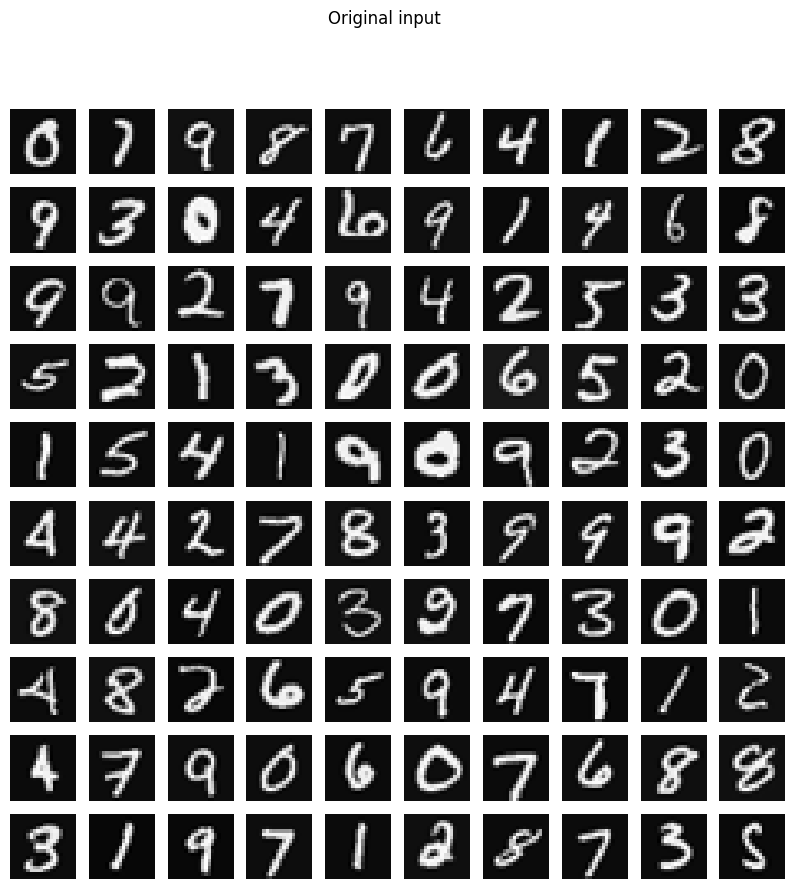

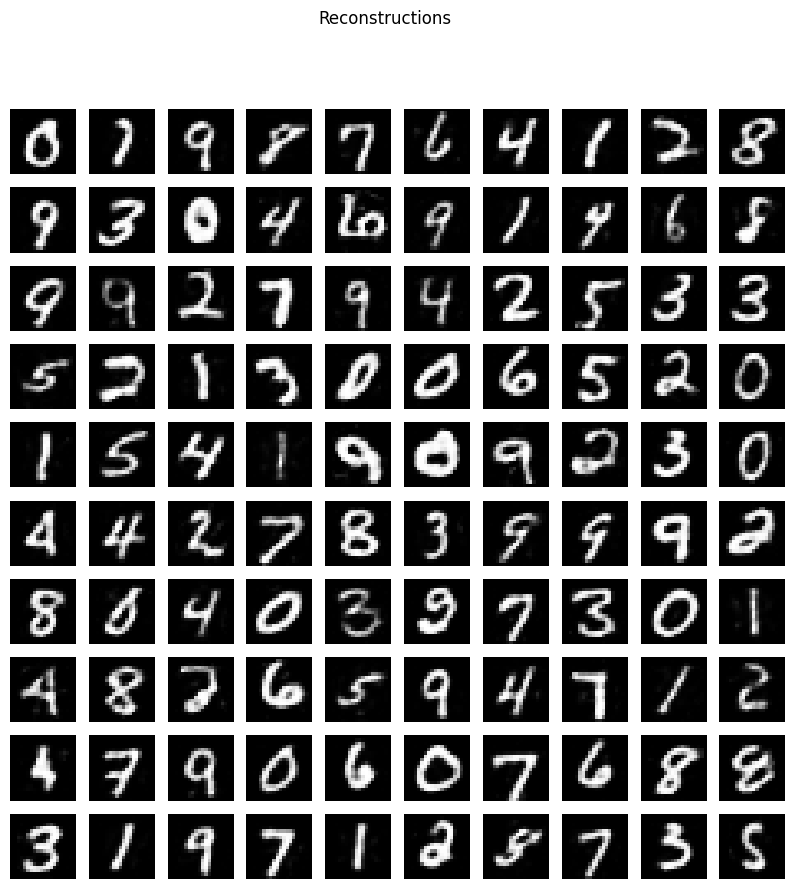

In [74]:
def theta_to_params(theta, theta_size):
    idx_W1_end = np.prod(theta_size[0])
    idx_W2_end = idx_W1_end + np.prod(theta_size[1])
    idx_b1_end = idx_W2_end + np.prod(theta_size[2])
    W1 = theta[:idx_W1_end].reshape(theta_size[0])
    W2 = theta[idx_W1_end:idx_W2_end].reshape(theta_size[1])
    b1 = theta[idx_W2_end:idx_b1_end].reshape(theta_size[2])
    b2 = theta[idx_b1_end:].reshape(theta_size[3])
    return W1, W2, b1, b2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X']
print("x shape",X.shape)

Xtrain, Xtemp = train_test_split(X, test_size=0.4, random_state=0)
Xval, Xtest = train_test_split(Xtemp, test_size=0.5, random_state=0)
print("Xtrain shape, Xtemp shape ", Xtrain.shape,Xtemp.shape)

# Decide a value for number of hidden units in the auto-encoder, num_hid,
# and the number of training iterations, num_iter. 
# Try different values until you get good results
num_hid = 35
num_iter = 8000

num_vis = Xtrain.shape[1]
theta, theta_size = init_nn_parameters(num_vis, num_hid, num_vis)
Xtrain = Xtrain.T
print("Xtrain.T shape", Xtrain.shape)

# Train the auto-encoder
cost_function = lambda p: cost_autoencoder(p, theta_size, Xtrain)
# use an optimizing function to get the optimal thetas
result = minimize(fun=cost_function, x0=theta, method='L-BFGS-B', jac=True, options={'maxiter': num_iter, 'disp': False})
opt_theta = result.x

# =============== Your code here ============================
# Feedforward the training data on the trained auto-encoder to get the output layer Xrec.
# You can use the function theta_to_params to get W1, W2, b1, b2 from opt_theta and theta_size

W1, W2, b1, b2 = theta_to_params(opt_theta, theta_size)


z2 = np.dot(W1, Xtrain) + b1
a2 = sigmoid(z2)
z3 = np.dot(W2, a2) + b2
a3 = sigmoid(z3)

Xrec = a3

# ============================================================


# Plot 10x10 images from the original data and the reconstructed data
def display_data(data, title):
    fig, axarr = plt.subplots(10, 10, figsize=(10, 10))
    for i in range(10):
        for j in range(10):
            axarr[i, j].imshow(data[:, i * 10 + j].reshape(20, 20).T, cmap='gray')
            axarr[i, j].axis('off')
    plt.suptitle(title)
    plt.show()

# Display original images
print("Xtrain.T shape emd", Xtrain.shape)
display_data(Xtrain, 'Original input')

# Display reconstructed images
display_data(Xrec, 'Reconstructions')


# Exercises for Pass with distinction (VG)

## Part 5 - Bias-variance analysis on the number of hidden units in a Neural Network

In [75]:
# Perform a bias-variance analysis on the number of
# hidden units in the neural network (numhid) to decide the optimal value. Show the
# bias-variance analysis plot and describe what is the best choice.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# choose 10 different number for your hidden layer and decide the optimal value throught the plot
numhidlist = [1,2,3,4,5,6,7,8,9,10] # You can change these values to try different values of numhid

ypredtrain = np.zeros(len(numhidlist))
ypredval = np.zeros(len(numhidlist))
ypredtest = np.zeros(len(numhidlist))

# Load and split data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X'].T
y = data['y'].reshape(-1, 1).T
Xtrain, Xval, Xtest = split_data(X, [0.6, 0.3, 0.1], 0)
ytrain, yval, ytest = split_data(y, [0.6, 0.3, 0.1], 0)

num_vis = Xtrain.shape[0]
num_out = len(np.unique(ytrain))


for i, numhid in enumerate(numhidlist):
    theta, theta_size = init_nn_parameters(num_vis, numhid, num_out)

    cost_function = lambda p: cost_neural_network(p, theta_size, Xtrain, ytrain)

    # =============== Your code here ============================
    # Chose a minimizer function from scipy in order to get the optimal theta
    
    opt_theta = ...
    
    # ========================================================

    ypredtrain[i] = np.mean(predict_neural_network(opt_theta, theta_size, Xtrain) == ytrain) * 100
    ypredval[i] = np.mean(predict_neural_network(opt_theta, theta_size, Xval) == yval) * 100
    ypredtest[i] = np.mean(predict_neural_network(opt_theta, theta_size, Xtest) == ytest) * 100


# =============== Your code here ============================
# Plot the results of ypredtrain and ypredval

# ========================================================

TypeError: 'ellipsis' object is not subscriptable

## Part 6 - Implement Softmax

In [ ]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    h = e_z / e_z.sum(axis=0, keepdims=True)
    return h

def check_gradient(J, theta):
    numgrad = np.zeros_like(theta)
    epsilon = 1e-4

    for i in range(len(numgrad)):
        e = np.zeros_like(theta).flatten()
        e[i] = epsilon
        numgrad[i] = (J(theta + e.reshape(theta.shape)) - J(theta - e.reshape(theta.shape))) / (2 * epsilon)

    return numgrad.flatten()

def init_softmax_parameters(numin, numout):
    theta = np.random.randn(numout, numin)
    theta = theta.ravel()
    return theta

def cost_softmax(theta, X, y, numClasses, lambda_=0):
    m, n = X.shape
    lambda_ = 0
    theta = np.reshape(theta, (numClasses, X.shape[0]))    
    y_mat = np.eye(num_classes)[y.reshape(-1)-1].T
    
    # =============== Your code here ============================
    # Calculate the hypothesis h using theta, X, and the function softmax. Use h to calculate J and grad. 
    # Remember to .ravel() the grad just as we did for the cost_neural_network
    
    # =============================================================
    
    return J, grad

def predict_softmax(theta, X, numClasses):
    
    # =============== Your code here ============================
    # Use similar as predict_neural_network
    
    # =============================================================
    return preds


# Create test data to check gradients
num_classes = 10
num_inputs = 5
num_samples = 20
X = np.random.randn(num_inputs, num_samples)
y = np.random.randint(1, num_classes+1, size=(1, num_samples))
print(X.shape,y.shape)

theta = init_softmax_parameters(num_inputs, num_classes)
cost, grad = cost_softmax(theta, X, y[0], num_classes)  # Adjust indexing here since y[0] gives the 1D array
numGrad = check_gradient(lambda p: cost_softmax(p, X, y[0], num_classes)[0], theta)  # Adjust indexing here too
diff = np.linalg.norm(numGrad - grad) / np.linalg.norm(numGrad + grad)
print(diff)


# =============== Your code here ============================
# Use the softmax on the raw MNISTsmall dataset

# =============================================================


# =============== Your code here ============================
# Use the softmax on the trained auto-encoder hidden layer

# =============================================================



## Part 7 - PyTorch MNIST Classification Tutorial

In [ ]:
# PyTorch MNIST Classification Tutorial

import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# We apply a transform to normalize the data.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Create your own neural network now
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # =============== Your code here ============================
        # Define your layers here with nn.Linear (optional: Try nn.Conv2d for a CNN)
        
        # ========================================================
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) # Flatten the image
        
        # =============== Your code here ==========================
        # Choose the activations functions here for example torch.sigmoid or torch.relu 
        # and use the previously defined layers above

        # ========================================================
        return x

net = Net()

#  Choose your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
epochs = 15 #choose a number of epochs

for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')
# Optional: Visualize some predictions
# This will display images along with predicted and true labels.
import numpy as np
dataiter = iter(testloader)
images, labels = next(dataiter)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert from Tensor image

# Show images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{labels[j].item()}' for j in range(10)))

# Get predictions
outputs = net(images.view(-1, 28*28))  # Reshape images to match the input shape of the network
_, predicted = torch.max(outputs, 1)

print('  Predicted: ', ' '.join(f'{predicted[j].item()}'
                              for j in range(10)))
